# Probabilstic PCA using PyTorch distributions

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

### Basic Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pandas as pd

dist =torch.distributions

sns.reset_defaults()
sns.set_context(context="talk", font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Generative model for PPCA in PyTorch

In [2]:
data_dim = 2
latent_dim = 1
num_datapoints = 100
z = dist.Normal(
    loc=torch.zeros([latent_dim, num_datapoints]),
    scale=torch.ones([latent_dim, num_datapoints]),)

w = dist.Normal(
    loc=torch.zeros([data_dim, latent_dim]),
    scale=5.0 * torch.ones([data_dim, latent_dim]),
)

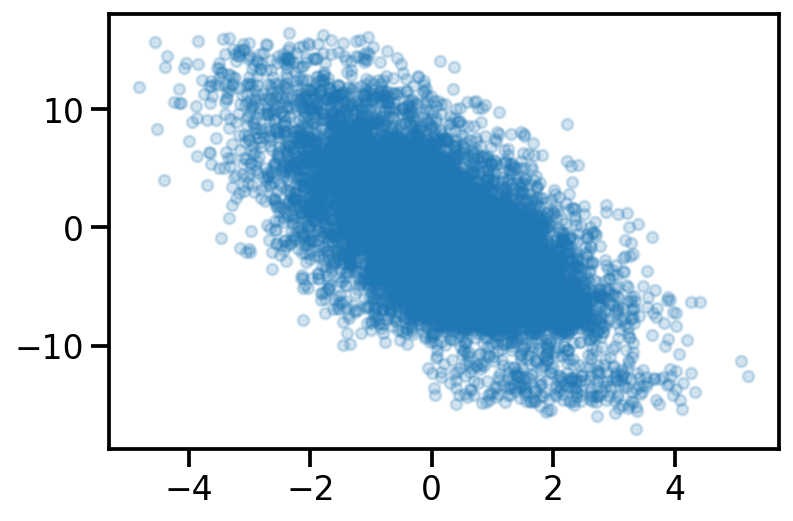

In [4]:
w_sample= w.sample()
z_sample = z.sample()


x = dist.Normal(loc = w_sample@z_sample, scale=1)
x_sample = x.sample([100])
plt.scatter(x_sample[:, 0], x_sample[:, 1], alpha=0.2, s=30)

### Generative model for PPCA in Pyro

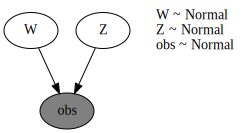

In [57]:
import pyro.distributions as dist
import pyro.distributions.constraints as constraints
import pyro

pyro.clear_param_store()


def ppca_model(data, latent_dim):
    N, data_dim = data.shape
    W = pyro.sample(
        "W",
        dist.Normal(
            loc=torch.zeros([latent_dim, data_dim]),
            scale=5.0 * torch.ones([latent_dim, data_dim]),
        ),
    )
    Z = pyro.sample(
        "Z",
        dist.Normal(
            loc=torch.zeros([N, latent_dim]),
            scale=torch.ones([N, latent_dim]),
        ),
    )

    mean = Z @ W

    return pyro.sample("obs", pyro.distributions.Normal(mean, 1.0), obs=data)


pyro.render_model(
    ppca_model, model_args=(torch.randn(150, 3), 1), render_distributions=True
)

In [59]:
ppca_model(x_sample[0], 3)

tensor([[-2.6332e-01, -1.2168e-01,  1.1337e+00,  1.5131e+00,  8.0517e-01,
          2.6422e-01,  7.1114e-01,  1.8042e+00, -9.6526e-02, -1.1945e+00,
          4.6856e-01, -8.1600e-01,  1.0741e+00, -1.4831e+00,  3.9232e-01,
         -6.8404e-01,  1.8204e+00, -1.2229e+00,  1.1181e+00, -8.0778e-01,
          2.5715e-01,  6.9224e-01, -4.4750e-01, -7.2472e-01, -2.1904e+00,
          1.5980e+00, -6.0359e-02, -1.1837e+00,  2.8247e+00, -1.7081e-01,
          3.9770e-01,  2.0955e+00,  6.0684e-01, -2.1764e+00, -8.2608e-01,
          7.6571e-01,  1.6087e+00,  1.5244e-01, -1.3338e+00, -4.9099e-01,
         -1.0110e+00,  1.5482e+00, -9.1735e-01,  6.2369e-02,  2.9865e+00,
          1.1091e+00,  7.2917e-01,  9.6844e-02, -5.2337e-01,  1.9494e+00,
         -3.1751e-01,  5.4692e-01, -1.3213e+00,  2.0667e+00, -3.2712e-02,
         -1.3477e+00, -3.1623e-01,  2.4289e+00, -1.5453e+00, -4.8398e-01,
          3.9627e-01, -2.5117e+00, -4.1484e-01,  9.2373e-01,  1.3905e+00,
         -6.6645e-03, -4.3878e-01,  1.

In [60]:
x_sampple

NameError: name 'x_sampple' is not defined

In [36]:
data_dim = 3
latent_dim = 2

W = pyro.sample(
        "W",
        dist.Normal(
            loc=torch.zeros([latent_dim, data_dim]),
            scale=5.0 * torch.ones([latent_dim, data_dim]),
        ),
    )

In [37]:
N = 150
Z = pyro.sample(
        "Z",
        dist.Normal(
            loc=torch.zeros([N, latent_dim]),
            scale=torch.ones([N, latent_dim]),
        ),
    )

In [38]:
Z.shape, W.shape

(torch.Size([150, 2]), torch.Size([2, 3]))

In [40]:
(Z@W).shape

torch.Size([150, 3])